## Import Libraries

In [3]:
#Data Procesing Libraries and Plotting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

#Keras

import keras
from keras import backend as K
from keras.layers import Dense, Activation, Embedding, Input, LSTM, Flatten
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping,Callback
from keras.models import model_from_json

#Evaluation

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

## Data - Numpy Arrays

Upload 2015 - 2018 AIH cleaned features: demographics, diagnosis and hospitalization data. For more details on how the arrays where created go to the project repo here:

**Training Arrays**

In [2]:
num_train = np.load('num_train.npy')

In [3]:
cat_train = np.load('cat_train.npy')

In [4]:
out_train = np.load('out_train.npy')

**Validation Arrays**

In [4]:
#Load validation numpy arrays

num_valid = np.load('num_valid.npy')

cat_valid = np.load('cat_valid.npy')

out_valid = np.load('out_valid.npy')

**Testing Arrays**

In [6]:
#Load test numpy arrays

num_test = np.load('num_test.npy')

cat_test = np.load('cat_test.npy')

out_test = np.load('out_test.npy')

** Shape for Each Sample**

In [7]:
print('num_input shape |', 'Train:',num_train.shape,'Valid:',num_valid.shape,'Test:',num_test.shape)

print('cat_input shape |', 'Train:',cat_train.shape,'Valid:',cat_valid.shape,'Test:',cat_test.shape)

print('out_input shape |', 'Train:',out_train.shape,'Valid:',out_valid.shape,'Test:',out_test.shape)

num_input shape | Train: (14621050, 9) Valid: (1674775, 9) Test: (319005, 9)
cat_input shape | Train: (14621050, 6) Valid: (1674775, 6) Test: (319005, 6)
out_input shape | Train: (14621050, 38) Valid: (1674775, 38) Test: (319005, 38)


**Shape of the Columns**

In [8]:
# Numerical Cols

num_cols = num_train.shape[1]

# Categorical Columns

cat_input_cols = cat_train.shape[1]

# Output Columns

out_cols = out_train.shape[1]

**Parameters of the embedding layer**

In [5]:
# Size of Unique of Categorical Features and Determine Number of Features (i.e. size of vocab)

dim = 9085

out_dim = int(np.round(dim**0.25,0))

print('Embedding Vector Size:', out_dim)

Embedding Vector Size: 10


**Set Epochs for all Models**

In [6]:
models_epochs = 25

## Functions to Define Metrics and Plot Evaluation Results

In [22]:
def plot_metrics(model_fit,title, xstep = 1):
  
  '''This function plots the results of accuracy by each epoch. 
  It takes the data from dictionary created by the fitting function from Keras.'''
  
  # summarize history for accuracy
  
  plt.plot(model_fit.history['acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.yticks(np.arange(0,1.2,step =0.2))
  plt.xlabel('epoch')
  plt.xticks(np.arange(0,models_epochs,step = xstep))
  plt.legend(['accuracy', 'recall', 'precision','auc_roc'], loc='upper left')
  plt.title(title)
  plt.show()

In [23]:
def plot_loss(model_fit,title, xstep = 1):
  
  '''This function plots the results of loss by each epoch. 
  It takes the data from dictionary created by the fitting function from Keras.'''
  
  # summarize history for loss
  plt.plot(model_fit.history['loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.xticks(np.arange(0,models_epochs,step = xstep))
  plt.show()

In [20]:
def plot_cv_results(data, title): 
    
    '''Plot Cross Validation Results'''
    
    fold_name = ['Fold 1','Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
    
    plt.barh(fold_name, data, align='center')
    
    plt.ylabel('fold number')
    
    plt.xlabel('results')
    
    plt.xticks(np.arange(0,120,step =20))
    
    plt.title(title)
    
    plt.show()

## Deep Network Model

**LR = 0.001**

In [14]:
# Categorical Inputs

cat_input = Input(shape=(cat_input_cols,), dtype='int32', name='cat_input')

# Embedding Layer

embed = Embedding(output_dim=out_dim, input_dim=dim, input_length=cat_input_cols)(cat_input)

# A LSTM will transform the vector sequence into a single vector, containing information about the entire sequence.

flatten = Flatten()(embed)

#Define numerical features input layer

num_input = Input(shape=(num_cols,), name='num_input')

# Input Layer. Concatenate numerical data & categorical data inputs into one input.

input_layer = keras.layers.concatenate([flatten, num_input])


# Dense Layers

layer1 = Dense(20, activation='relu')(input_layer)
layer2 = Dense(20, activation='relu')(layer1)

# Output Layer

main_output = Dense(out_cols, activation='softmax', name='main_output')(layer2)

# Model

model1 = Model(inputs=[cat_input, num_input], outputs=[main_output])

# Optimizer: Adam Gradient Descent

adamgrad = keras.optimizers.Adagrad(lr=0.001, epsilon=None, decay=0.0)

#Compile Model

model1.compile(optimizer=adamgrad, loss={'main_output':'categorical_crossentropy'},
               metrics=['accuracy'])

In [15]:
%%time

# Fit Model Function

model1_hist = model1.fit({'cat_input':cat_train, 'num_input': num_train}, 
                         {'main_output': out_train},
                         epochs=models_epochs, 
                         batch_size = 128,
                         shuffle = True, 
                         verbose = 1)

Epoch 1/25
 - 566s - loss: 0.8602 - acc: 0.7729
Epoch 2/25
 - 574s - loss: 0.5530 - acc: 0.8519
Epoch 3/25
 - 571s - loss: 0.4927 - acc: 0.8652
Epoch 4/25
 - 575s - loss: 0.4616 - acc: 0.8725
Epoch 5/25
 - 572s - loss: 0.4408 - acc: 0.8774
Epoch 6/25
 - 579s - loss: 0.4253 - acc: 0.8812
Epoch 7/25
 - 575s - loss: 0.4132 - acc: 0.8842
Epoch 8/25
 - 572s - loss: 0.4034 - acc: 0.8868
Epoch 9/25
 - 571s - loss: 0.3954 - acc: 0.8891
Epoch 10/25
 - 568s - loss: 0.3887 - acc: 0.8908
Epoch 11/25
 - 577s - loss: 0.3829 - acc: 0.8924
Epoch 12/25
 - 571s - loss: 0.3779 - acc: 0.8938
Epoch 13/25
 - 570s - loss: 0.3735 - acc: 0.8950
Epoch 14/25
 - 575s - loss: 0.3696 - acc: 0.8961
Epoch 15/25
 - 571s - loss: 0.3661 - acc: 0.8972
Epoch 16/25
 - 576s - loss: 0.3629 - acc: 0.8980
Epoch 17/25
 - 571s - loss: 0.3601 - acc: 0.8987
Epoch 18/25
 - 575s - loss: 0.3574 - acc: 0.8993
Epoch 19/25
 - 573s - loss: 0.3550 - acc: 0.8999
Epoch 20/25
 - 572s - loss: 0.3527 - acc: 0.9004
Epoch 21/25
 - 572s - loss: 0

**Save Model**

In [16]:
# Save model history metrics

np.save('training_metrics_dict.npy', model1_hist)

In [17]:
# serialize model to JSON

model_json = model1.to_json()

with open("deep_learning_model1.json", "w") as json_file:
    json_file.write(model_json)

    # serialize weights to HDF5

    model1.save_weights("deep_learning_model1_weights.h5")

print("Saved model to disk")

Saved model to disk


**Plot Results of DNN Model** 

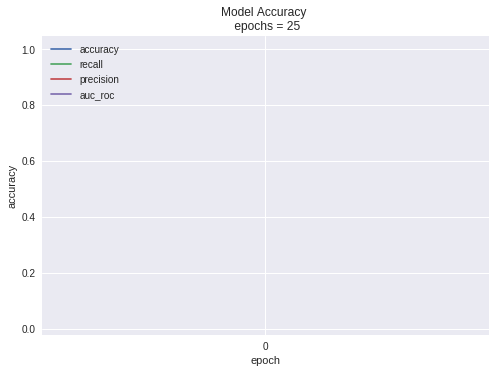

In [93]:
plot_metrics(model_fit = model1_hist,title = 'Model Accuracy \n epochs = 25')

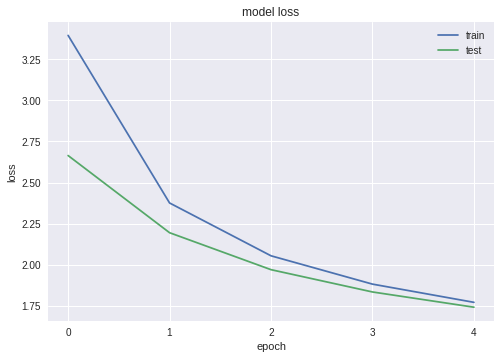

In [126]:
plot_loss(model_fit = model1_hist,title = 'Baseline Model Loss \n epochs = 25')

## Load Model for Evaluation

In [20]:
# load json and create model

json_file = open("deep_learning_model1.json", 'r')

loaded_model_json = json_file.read()

json_file.close()

loaded_model = model_from_json(loaded_model_json)

# load weights into new model

loaded_model.load_weights("deep_learning_model1_weights.h5")

print("Loaded model from disk")

Loaded model from disk


## Evaluate Model

In [22]:
#Optimizer

adamgrad = keras.optimizers.Adagrad(lr=0.001, epsilon=None, decay=0.0)

# Compile Model

loaded_model.compile(optimizer=adamgrad, loss={'main_output':'categorical_crossentropy'},metrics=['accuracy'])

#Score Model

score = loaded_model.evaluate({'cat_input':cat_test, 'num_input': num_test}, 
                              {'main_output': out_test}, batch_size=128, verbose=2)

#Print Results

print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

acc: 90.23%


## K-Fold Cross Validation

**Define Model**

In [7]:
# Numerical Cols

num_cols_valid = num_valid.shape[1]

# Categorical Columns

cat_input_cols_valid = cat_valid.shape[1]

# Output Columns

out_cols_valid = out_valid.shape[1]

In [8]:
# Categorical Inputs

cat_input = Input(shape=(cat_input_cols_valid,), dtype='int32', name='cat_input')

# Embedding Layer

embed = Embedding(output_dim=out_dim, input_dim=dim, input_length=cat_input_cols_valid)(cat_input)

# A LSTM will transform the vector sequence into a single vector, containing information about the entire sequence.

flatten = Flatten()(embed)

#Define numerical features input layer

num_input = Input(shape=(num_cols_valid,), name='num_input')

# Input Layer. Concatenate numerical data & categorical data inputs into one input.

input_layer = keras.layers.concatenate([flatten, num_input])


# Dense Layers

layer1 = Dense(20, activation='relu')(input_layer)
layer2 = Dense(20, activation='relu')(layer1)

# Output Layer

main_output = Dense(out_cols_valid, activation='softmax', name='main_output')(layer2)

# Model

modelcv = Model(inputs=[cat_input, num_input], outputs=[main_output])

# Optimizer: Adam Gradient Descent

adamgrad = keras.optimizers.Adagrad(lr=0.001, epsilon=None, decay=0.0)

#Compile Model

modelcv.compile(optimizer=adamgrad, loss={'main_output':'categorical_crossentropy'},
               metrics=['accuracy'])

In [9]:
def kfold_crossvalidate(cat_input, 
                        num_input,
                        out_input, 
                        model = modelcv, 
                        splits = 5, seed = 42, 
                        epochs = models_epochs, 
                        batch = 128): 
  
  # Random Seed
  
  random_seed = seed
  
  # Divide data in k_folds
  
  kfold = KFold(n_splits = splits, shuffle=True, random_state=seed)
  
  # Initialize score list
  
  cvscores = []
  
  for train, test in kfold.split(cat_input, num_input,main_output):
    
    # Fit the model
    
    model.fit({'cat_input':cat_input[train], 
               'num_input': num_input[train]}, 
              {'main_output': out_input[train]},
              epochs=models_epochs, batch_size = batch,shuffle = True, verbose = 1)
    
    # evaluate the model
    
    scores = model.evaluate({'cat_input':cat_input[train], 'num_input': num_input[train]}, {'main_output': out_input[train]}, 
                            batch_size=batch, verbose=0)
    
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    
    cvscores.append(scores[1] * 100)
  
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
  
  return np.array(cvscores)

In [10]:
%%time

model1_cv = kfold_crossvalidate(cat_input = cat_valid,
                                num_input =num_valid, 
                                out_input = out_valid, 
                                model = modelcv, 
                                splits = 5, seed = 42, 
                                epochs = models_epochs, 
                                batch = 128)
model1_cv

Epoch 1/25
1339820/1339820 [==============================] - 51s 38us/step - loss: 1.6576 - acc: 0.5918
Epoch 2/25
1339820/1339820 [==============================] - 51s 38us/step - loss: 1.1328 - acc: 0.7022
Epoch 3/25
1339820/1339820 [==============================] - 50s 37us/step - loss: 0.9907 - acc: 0.7291
Epoch 4/25
1339820/1339820 [==============================] - 50s 37us/step - loss: 0.9065 - acc: 0.7508
Epoch 5/25
1339820/1339820 [==============================] - 50s 37us/step - loss: 0.8472 - acc: 0.7646
Epoch 6/25
1339820/1339820 [==============================] - 50s 38us/step - loss: 0.8024 - acc: 0.7817
Epoch 7/25
1339820/1339820 [==============================] - 50s 38us/step - loss: 0.7666 - acc: 0.7910
Epoch 8/25
1339820/1339820 [==============================] - 50s 38us/step - loss: 0.7372 - acc: 0.7971
Epoch 9/25
1339820/1339820 [==============================] - 50s 38us/step - loss: 0.7122 - acc: 0.8035
Epoch 10/25
1339820/1339820 [==========================

In [11]:
# Save model history metrics

np.save('cv_metrics_array.npy', model1_cv)

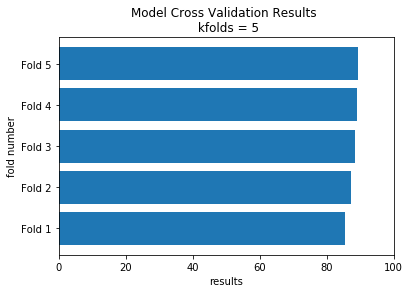

In [21]:
plot_cv_results(data =  model1_cv, title = 'Model Cross Validation Results \n kfolds = 5')